In [1]:
!pip install --upgrade scipy

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Please upload the file titanic_train.csv to your environment
data = pd.read_csv('Data/titanic_train.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
#Sample 30 passengers from 3rd class
c3_sample = data[data['Pclass']==3]['Fare'].sample(30)
c3_sample

125    11.2417
365     7.2500
19      7.2250
436    34.3750
347    16.1000
167    27.9000
846    69.5500
548    20.5250
464     8.0500
28      7.8792
503     9.5875
225     9.3500
353    17.8000
171    29.1250
376     7.2500
203     7.2250
8      11.1333
744     7.9250
441     9.5000
153    14.5000
652     8.4333
561     7.8958
798     7.2292
479    12.2875
821     8.6625
91      7.8542
788    20.5750
838    56.4958
764     7.7750
762     7.2292
Name: Fare, dtype: float64

In [6]:
import numpy as np

In [7]:
#interregnum
#say we see the two following samples:

samp1 = np.array([10, 12, 9, 11, 9, 10, 10, 12, 13, 11])
samp2 = np.array([10, 12, 9, 11, 9, 10, 10, 12, 9, 8])

#which of them would you say is more "consistent" with the H0 that the average is 10?

In [12]:
print("samp1 mean: ", samp1.mean())
print("samp2 mean: ", samp2.mean())

samp1 mean:  10.7
samp2 mean:  10.0


In [13]:
#no difficulty accepting this. However...
#which of these would you say is more "consistent" with the H0 that the average is 10?

samp3 = np.array([10, 12, 9, 11, 9, 10, 10, 11, 12, 9])
samp4 = np.array([21, 2, 0, 21, 5, 15, 3, 17, 16, 2])

print("samp3 mean: ", samp3.mean())
print("samp4 mean: ", samp4.mean())

samp3 mean:  10.3
samp4 mean:  10.2


In [ ]:
#even if sample 4 has an average that is farther from 10, somehow there's more intuitive confidence that the values don't deviate from 10 that much...

In [14]:
#no difficulty accepting this. However...
#finally which of these would you say is more "consistent" with the H0 that the average is 10?

samp6 = np.array([19, 2, 3, 17, 5, 15, 3, 17, 16, 3, 12])
samp7 = np.array([19, 2, 3, 17, 5, 15, 3, 17, 16, 3, 12, 19, 2, 3, 17, 5, 15, 3, 17, 16, 3, 12,19, 2, 3, 17, 5, 15, 3, 17, 16, 3, 12,19, 2, 3, 17, 5, 15, 3, 17, 16, 3, 12])

print("samp6 mean: ", samp6.mean())
print("samp7 mean: ", samp7.mean())
print("samp6 std: ", samp6.std())
print("samp7 std: ", samp7.std())

samp6 mean:  10.181818181818182
samp7 mean:  10.181818181818182
samp6 std:  6.603279926303592
samp7 std:  6.603279926303592


In [ ]:
#so... even if the variance is similar and the mean is not perfect, you get a bit of piece of mind from seeing many more samples

In [ ]:
#end of interregnum

In [19]:
#compute the test statistics and the p-value
# let's compare decisions in the class. Maybe we need to change sample size?
st.ttest_1samp(c3_sample,17)

TtestResult(statistic=-0.39539672999945097, pvalue=0.6954437921748222, df=29)

In [22]:
0.00000000016419<0.05

True

In [23]:
#...and for a single tailed experiment #requires scipy>1.6.0
st.ttest_1samp(c3_sample,17,alternative='less')

TtestResult(statistic=-0.39539672999945097, pvalue=0.3477218960874111, df=29)

In [42]:
#do it yourself
#check if 1st class prices are different from 85 usd by sampling 30 1st class passengers and requiring a 5% significance.

#H0: \mu_1 = 85, H1 \mu_1 != 85

data[data['Pclass']==1]['Fare'].head(50)

1       71.2833
3       53.1000
6       51.8625
11      26.5500
23      35.5000
27     263.0000
30      27.7208
31     146.5208
34      82.1708
35      52.0000
52      76.7292
54      61.9792
55      35.5000
61      80.0000
62      83.4750
64      27.7208
83      47.1000
88     263.0000
92      61.1750
96      34.6542
97      63.3583
102     77.2875
110     52.0000
118    247.5208
124     77.2875
136     26.2833
137     53.1000
139     79.2000
151     66.6000
155     61.3792
166     55.0000
168     25.9250
170     33.5000
174     30.6958
177     28.7125
185     50.0000
187     26.5500
194     27.7208
195    146.5208
209     31.0000
215    113.2750
218     76.2917
224     90.0000
230     83.4750
245     90.0000
248     52.5542
252     26.5500
256     79.2000
257     86.5000
258    512.3292
Name: Fare, dtype: float64

In [74]:
#answer
c1_sample = data[data['Pclass']==1]['Fare'].sample(10)
st.ttest_1samp(c1_sample,85)

TtestResult(statistic=-2.555093459985471, pvalue=0.03093514855977216, df=9)

In [76]:
#Example: Matched Pair.
#The data in the two samples is dependent. In the data we are studying the blood pressure before and after the treatment.

blood_pressure = pd.read_csv('Data/blood_pressure.csv')
blood_pressure.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [80]:
# H₀: 𝛍₁=𝛍₂   vs   H₁: 𝛍₁≠𝛍₂   
st.ttest_rel(blood_pressure['after'], blood_pressure['before'])
st.ttest_rel(blood_pressure['before'], blood_pressure['after'])

# H₀: 𝛍₁≤𝛍₂    vs   H₁: 𝛍₁>𝛍₂     
st.ttest_rel(blood_pressure['before'], blood_pressure['after'], alternative = 'greater')

# H₀: 𝛍₁≥𝛍₂   vs   H₁: 𝛍₁<𝛍₂  
st.ttest_rel(blood_pressure['after'], blood_pressure['before'], alternative = 'greater')

TtestResult(statistic=-27.29184176756024, pvalue=7.303035069607835e-48, df=99)

In [84]:
#Independent Samples
#For two groups where we cannot match the observations to one another. In this case transactions from a website with different interfaces (a, b)

ab_test = pd.read_csv('Data/ab_test.csv')
ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [85]:
## What are we saying here?
# (that the new interface has or not an effect on the transactions)
# H₀: 𝛍₁=𝛍₂   vs   H₁: 𝛍₁≠𝛍₂   
# H₀: 𝛍₁≥𝛍₂   vs   H₁: 𝛍₁<𝛍₂  
# H₀: 𝛍₁≤𝛍₂    vs   H₁: 𝛍₁>𝛍₂     

st.ttest_ind(ab_test['a'], ab_test['b'], equal_var=False) # if we don't assume equal variance the test will be more robust

TtestResult(statistic=-2.637533181209767, pvalue=0.009776243024828825, df=93.79317907867807)

<Axes: >

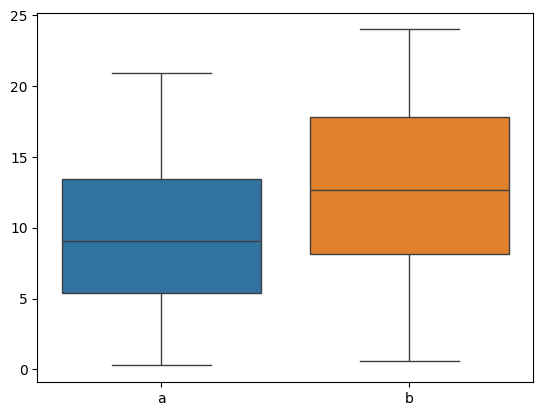

In [86]:
sns.boxplot(data = ab_test)

In [89]:
#ANOVA test
#to compare the means of multiple groups at the same time

interest_r = pd.read_csv('Data/rate_by_city.csv')
interest_r.head(50)

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1
5,13.00,1
6,13.00,1
7,12.75,1
8,12.50,1
9,14.25,2


In [90]:
interest_r['city_count'] = interest_r.groupby('City').cumcount() ##is the new index

interest_r_pivot = interest_r.pivot(index='city_count', columns='City', values='Rate')
interest_r_pivot.columns = ['City_'+str(x) for x in interest_r_pivot.columns.values]
interest_r_pivot

,City_1,City_2,City_3,City_4,City_5,City_6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [91]:
# H₀: 𝛍₁=𝛍₂=...=𝛍ₙ   vs   H₁: 𝛍ₛ≠𝛍ₜ for some s,t   
st.f_oneway(interest_r_pivot['City_1'],
            interest_r_pivot['City_2'],
            interest_r_pivot['City_3'],
            interest_r_pivot['City_4'],
            interest_r_pivot['City_5'],
            interest_r_pivot['City_6'])

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)